## simple forecasting models 
- primitive models sometimes outperform more advanced models
- with random data simple models perform the same or better than advanced models
- advanced models are good for exploiting patterns
- simple methods exploit some fact(mean, general trend, last observation)

### some simple models 
- naive method: returns the last observation as a forecast value, this can be twecked so that it fits a saesonal model  'naive()'
- mean method: returns the mean as a forecast value 'meanf()'
- drift method: carries the change over the 1st and last observation into the future 'rwf()'

In [6]:
# set a seed so that the results will be reproducible

set.seed(50)
testts = ts( rnorm(300), start=c(1919, 1), frequency = 4)

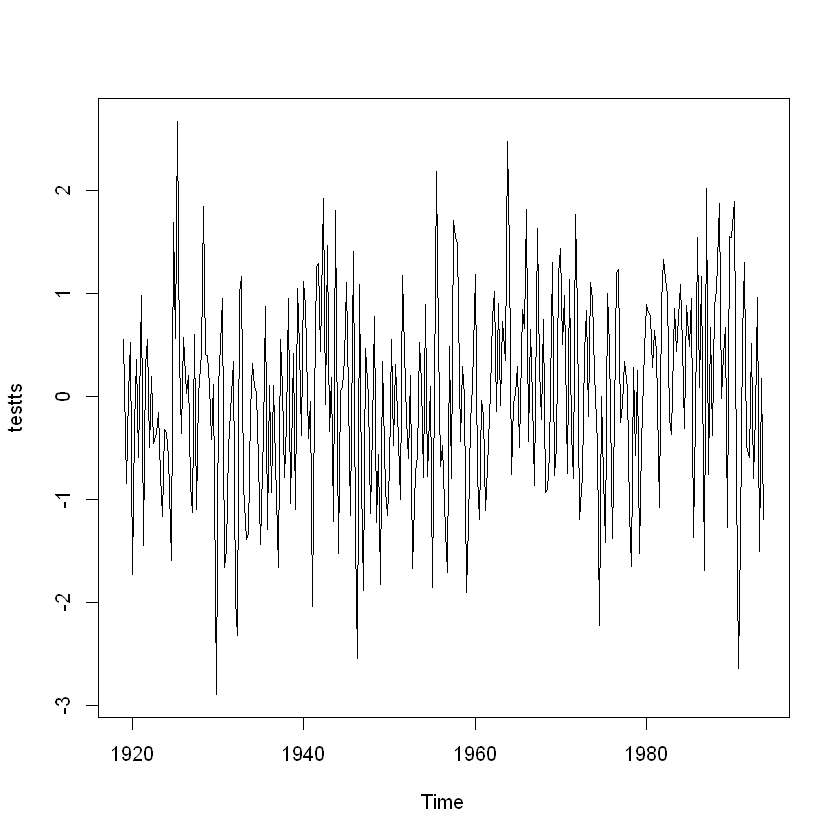

In [7]:
plot(testts)

In [14]:
library(forecast) # to access meanf(), naive(), rwf

# = meanf(data, h=number_of_observations_to_forecast)
mean_m = meanf(testts, h =30) 
# = naive(data, h=number_of_observations_to_forecast)
naive_m = naive(testts, h=30)

# = meanf(data, h=number_of_observations_to_forecast)
drift_m = rwf(testts, h=30, drift=1)

# these perform well on random data set and are very good benchmarks 

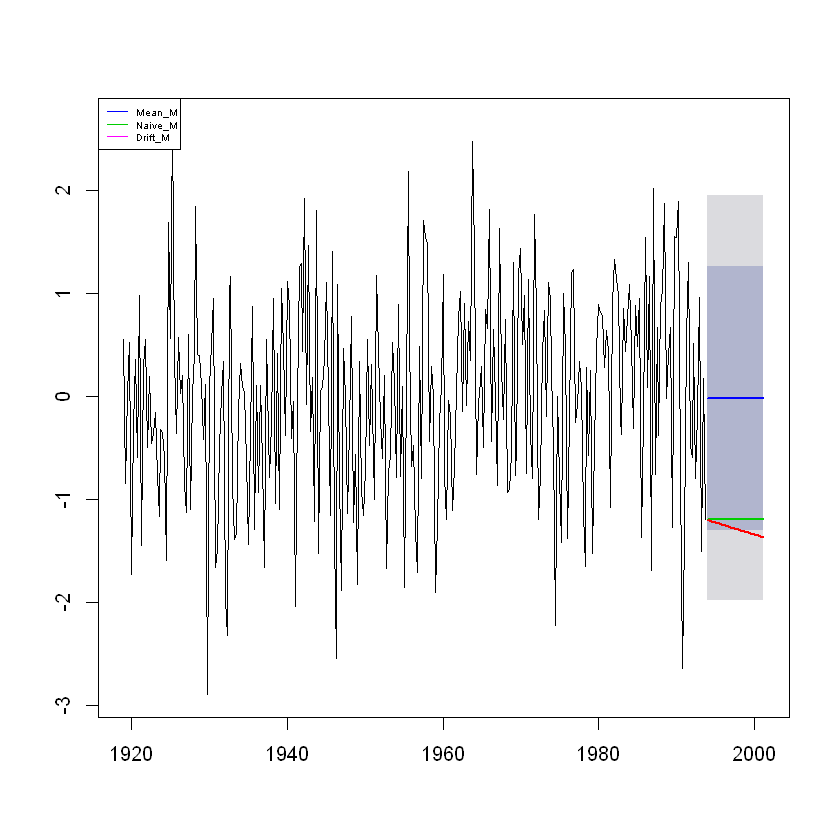

In [13]:
# plot the mean_m
plot(mean_m, main="")
# add the lines $mean means access the predicted values, col=color, lwd=line width
lines(naive_m$mean, col=123, lwd=2)
lines(drift_m$mean, col=2, lwd=2)
legend("topleft", lty=1, cex=0.5, col=c(4,123,22), legend=c("Mean_M", "Naive_M", "Drift_M"))

## model comparison 
- forecast accuracy 
- error indicators: Root mean squared error rmse, mean absolute error mae, mean absolute scale error mase, mean absolute percent error mape
- to compare models we can use a scale depend error MAE and RMSE are both on the same scale

$$\frac{\sum_{i = 1}^{n} y_{i} - y_{i}^{\wedge} }{n}= MAE$$

$$\sqrt{\frac{\sum_{i = 1}^{n} (y_{i} - y_{i}^{\wedge})^{2} }{n}}= RMSE$$

these two methods compares observed values vs forecast values

- MASE forecast error vs error of naive model, MAPE is model independant, AIC (lower is better); accuracy() returns these 4 error indicators except aic

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.146651e-18,0.9922591,0.7999341,103.27287,103.27287,0.7247526,0.06882037,NA
Test set,-5.947488e-05,0.9250726,0.7350389,99.97963,99.97963,0.6659566,-0.15127726,0.9658077


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002185465,1.351649,1.086030,-32.96660,564.0232,0.9839598,-0.4830987,NA
Test set,1.714805941,1.948414,1.768427,97.41156,466.8504,1.6022227,-0.1512773,1.675834


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.243519e-14,1.351647,1.086125,-32.43850,563.4943,0.9840464,-0.4830987,NA
Test set,1.805503e+00,2.032968,1.854351,95.38722,492.5072,1.6800705,-0.1268056,1.767978


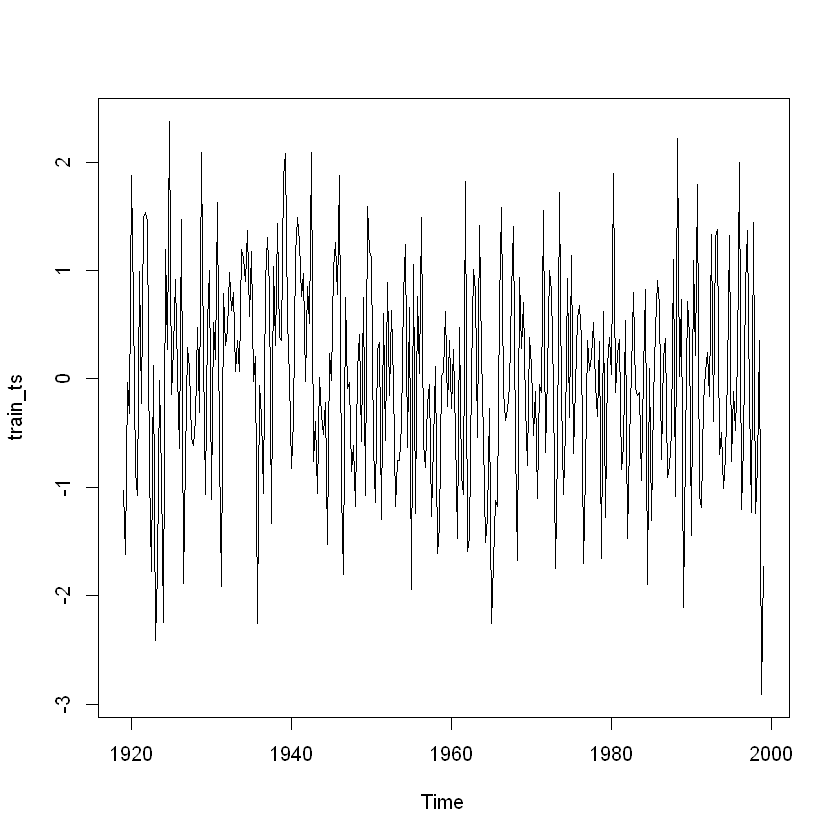

In [21]:
## accuracy of model comparison 
library(forecast)

set.seed(95)
myts<-ts(rnorm(400), start=c(1919,1), frequency=4)

# training set 80% of the data
# window takes a part of the dataset 
# here we use 80%, 20% split to train then test
train_ts <- window(myts, start=1919, end=1999)
test_ts <- window(myts, start=2000)

plot(train_ts)

mean_n <- meanf(train_ts, h=80)
naive_n <- naive(train_ts, h=80)
drift_n <- rwf(train_ts, h=80, drift=T) 

accuracy(mean_n, test_ts)
accuracy(naive_n, test_ts)
accuracy(drift_n, test_ts)


## residuals
- indicator of model quality; only randomness should remain in the residual 
- in an ideal world model will have a mean of zero and constant variance, with normal distribution
- non-zero mean (add or subtract)
- correlated residual (differencing)

[1] 0.9876549

[1] 4.146651e-18

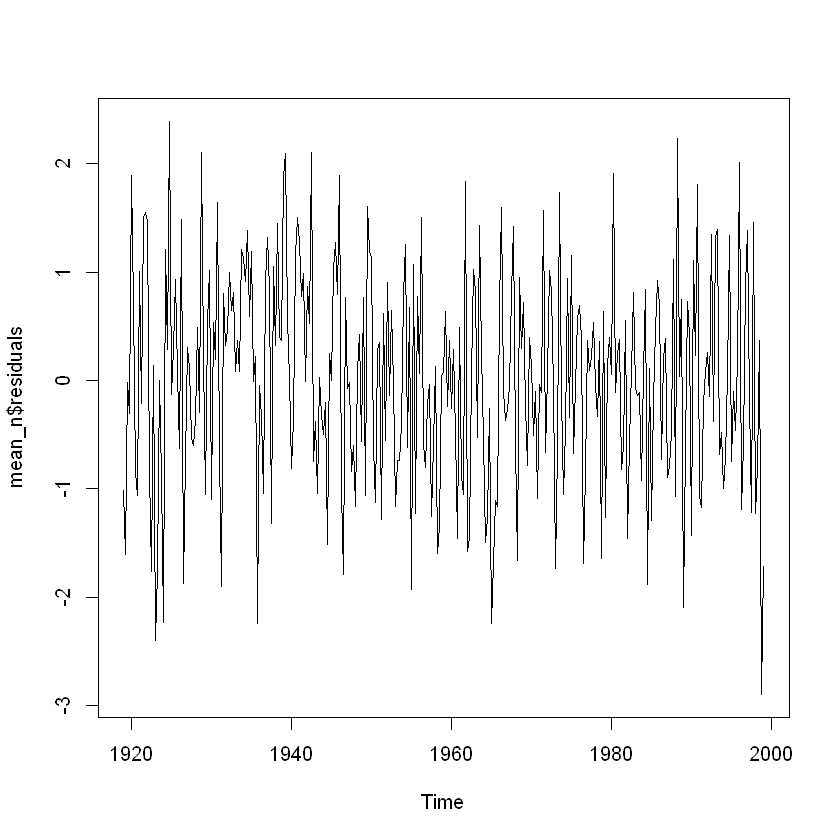

In [29]:
var(mean_n$residuals)    # variance of residuals
mean(mean_n$residuals)   # mean of residuals
plot(mean_n$residuals)

[1] 1.798592

[1] 0.006605028

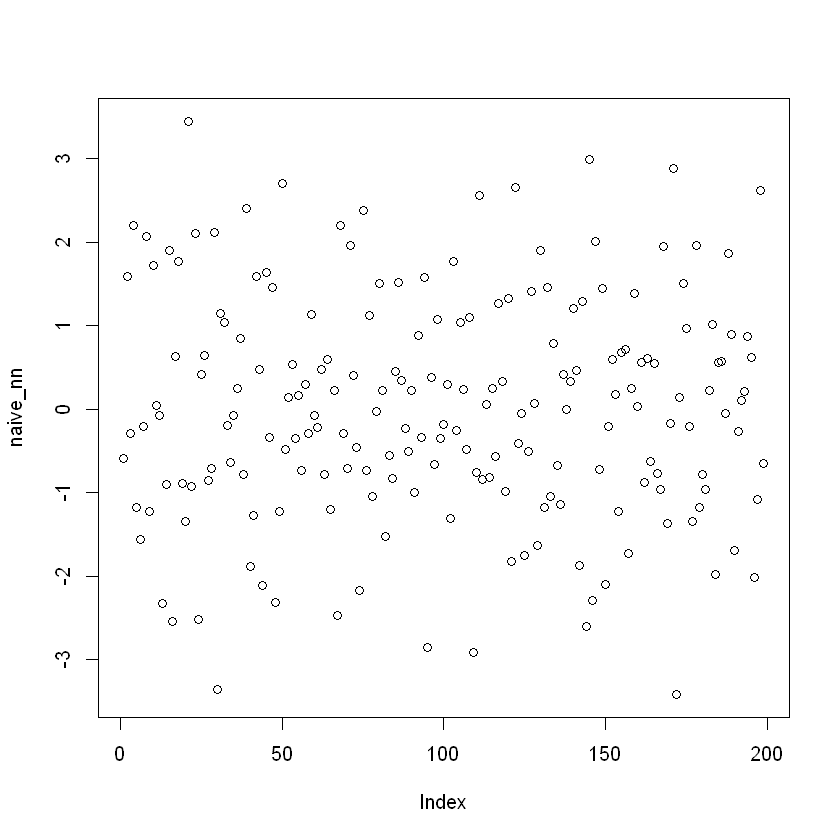

In [31]:
# to plot naive we need to extract the first na
naive_nn<- naive_n$residuals[2:200]
var(naive_nn)
mean(naive_nn)
plot(naive_nn)

[1] 1.798592

[1] 0.008790492

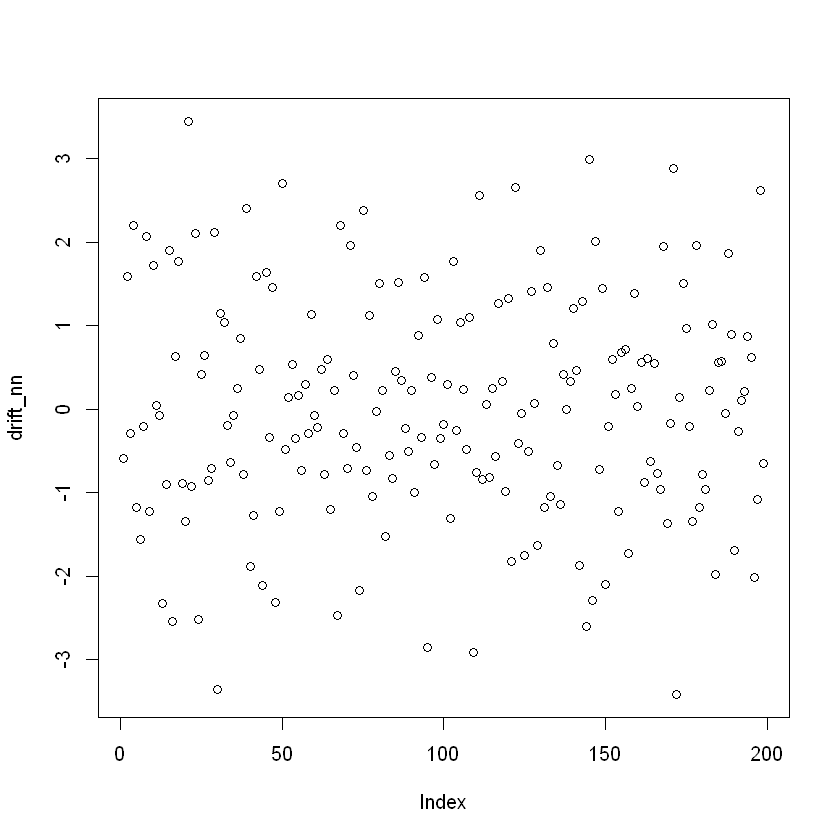

In [34]:
# we must also remove the first na from drift
drift_nn <- drift_n$residuals[2:200]
var(drift_nn)
mean(drift_nn)
plot(drift_nn)

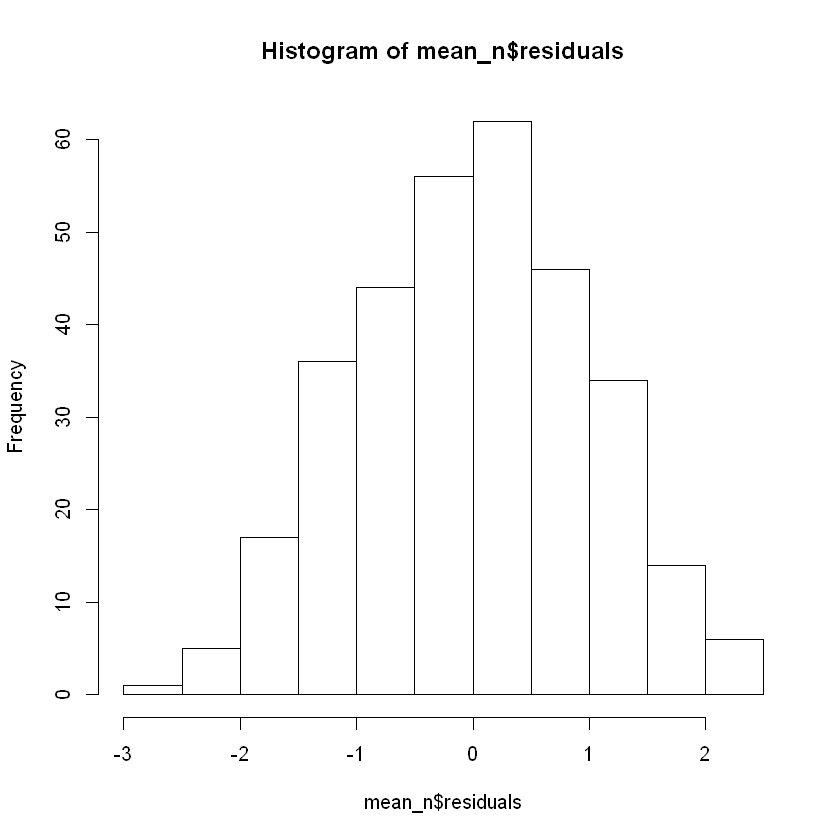

In [35]:
# histogram of distribution 
hist(mean_n$residuals)
# we want a normal distrubution, and it comes faily close to normal dist


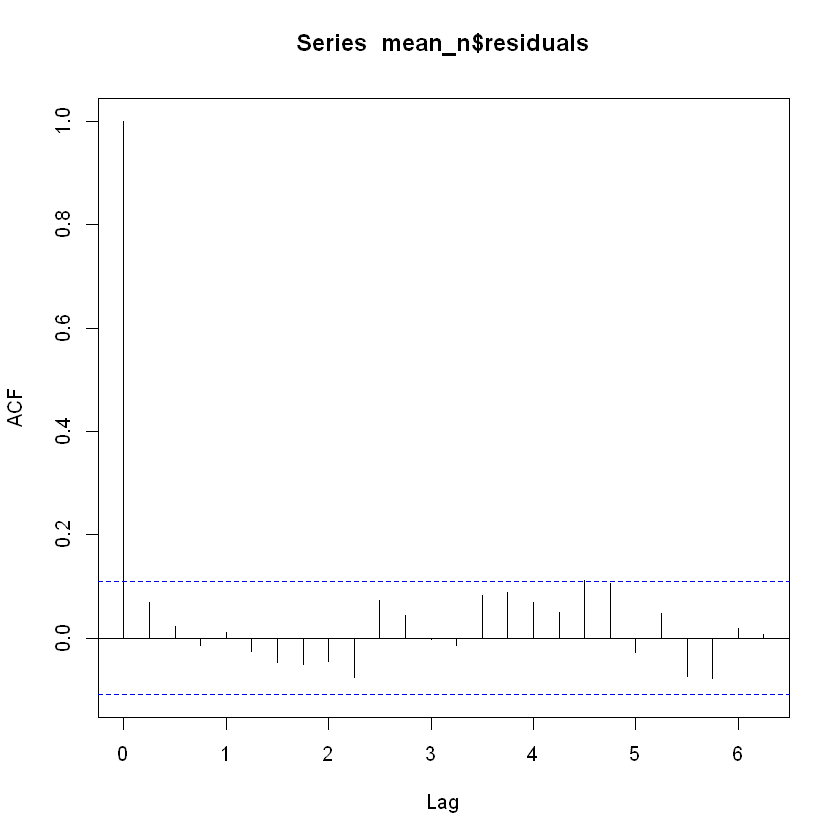

In [36]:
# autocorrelation acf plot, any bars below or on top of the treshhold would mean autocorrelation
acf(mean_n$residuals)